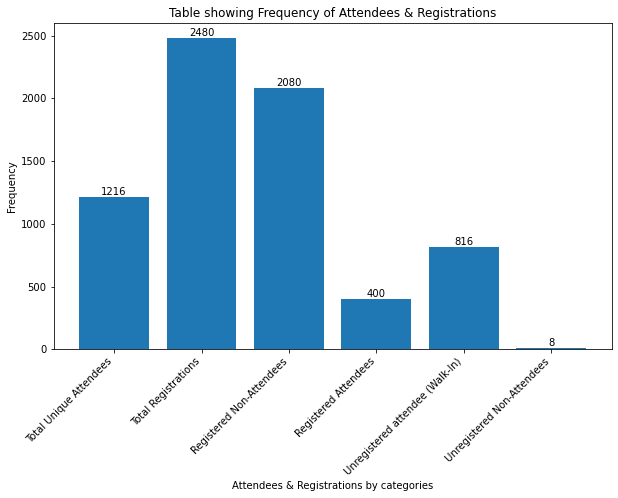

In [1]:
"""                           
                      
                  Using barchat to display the number of  registered delegates and attendees?
        Note: You are required to have preinstalled the needed third party libraries as stated in the documentation
"""

#Library importation
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

#------ Connect to MySql Database ----------#
dbConnect=mysql.connector.connect(host="localhost",user="root",password="password",database="BookMeIn2", auth_plugin='mysql_native_password')
mycursor=dbConnect.cursor()

#------ Display header/title ----------#
display(HTML("<h1 style='color:red;text-align:center; font-size:40px;'>Virtual Event Analysis</h1><h3 style='color:blue;text-align:center; font-size:25px;'>How many delegates registered and how many attended?</h3><br />"))

#------------- View Table to store calulated values and insert------#
sql = "DROP TABLE IF EXISTS regAt_tbl, attendeesSplit_tbl"
mycursor.execute(sql)
mycursor.execute("CREATE TABLE regAt_tbl ( id int NOT NULL AUTO_INCREMENT, name varchar(255) NOT NULL, counts int, PRIMARY KEY (id))")
insertQuery = "INSERT INTO regAt_tbl(name, counts) VALUES ('Total Unique Attendees', (SELECT COUNT(DISTINCT(attendee_id)) FROM registrations WHERE registered=1 AND event_id=4114)), ('Total Registrations', (SELECT COUNT(DISTINCT(attendee_id))  FROM registrations WHERE preregistration=1)), ('Registered Non-Attendees', (SELECT COUNT(DISTINCT(attendee_id)) FROM registrations WHERE registered=0 AND preregistration=1 and event_id=4114)), ('Registered Attendees', (SELECT COUNT(DISTINCT(attendee_id)) FROM registrations WHERE registered=1 AND preregistration=1 and event_id=4114)), ('Unregistered attendee (Walk-In)', (SELECT COUNT(DISTINCT(attendee_id)) FROM registrations WHERE registered=1 AND preregistration=0 and event_id=4114)), ('Unregistered Non-Attendees', (SELECT COUNT(DISTINCT(attendee_id)) FROM registrations WHERE registered=0 AND preregistration=0 and event_id=4114))"
mycursor.execute(insertQuery)
dbConnect.commit()

#-------------Query Total Attendees & Deligates ------------#
mycursor.execute("SELECT name, counts from regAt_tbl")
result = mycursor.fetchall
#create array for categories(name) and numbers
name = []
counts = []
#loop through output and append each element in iteration to the right array.
for i in mycursor:
    name.append(i[0])
    counts.append(i[1])

# Plot graph for Data Visulization using Matplotlib library
plt.figure(figsize=(10,6))
plt.bar(name, counts)
plt.ylim(0, 2600)
plt.xlabel("Attendees & Registrations by categories")
plt.ylabel("Frequency")
plt.title("Table showing Frequency of Attendees & Registrations")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
for i in range(len(counts)):
    plt.annotate(str(counts[i]), xy=(name[i],counts[i]), ha='center', va='bottom')
plt.show()

#Graph Description
display(HTML("<p>Output Explanation: This graph displays the number of delegates who registered and attended each session. In total, 2480 people registered to attend the conference, however only 400 of those attended. Out of the 1216 people who attended, 816 did not register.</p>"))

#----------Footer Section for report generation navigation -----------------#
footer = "<div style='width:100%; text-align:center;'> <a href='Question2.html' style='color:blue;'>Next</a></div>"
display(HTML(footer))